### About The Data Set:
This dataset contains information on the levels of nitrogen, phosphorus, and potassium in soil, as well as temperature, humidity, pH, and rainfall, and their impact on the growth of crops. The data can be used to make data-driven recommendations for achieving optimal nutrient and environmental conditions to improve crop yield.

1. Nitrogen: 
This column represents the amount of nitrogen (in kg/ha) present in the soil for the crop. Nitrogen is an essential nutrient required for plant growth, and its deficiency or excess can affect the growth and yield of the crop.

2. Phosphorus: 
This column represents the amount of phosphorus (in kg/ha) present in the soil for the crop. Phosphorus is another essential nutrient required for plant growth and is important for processes such as energy transfer and photosynthesis.

3. Potassium: 
This column represents the amount of potassium (in kg/ha) present in the soil for the crop. Potassium is also an essential nutrient required for plant growth and plays a role in various physiological processes such as water regulation and nutrient transport.

4. Temperature: 
This column represents the average temperature (in Celsius) during the crop's growing period. Temperature is an important environmental factor that can affect crop growth and development, and different crops have different temperature requirements for optimal growth.

5. Humidity: 
This column represents the average relative humidity (in percentage) during the crop's growing period. Humidity is another important environmental factor that can affect crop growth, as high humidity can promote disease and fungal growth.

6. PH: 
This column represents the soil pH during the crop's growing period. pH is a measure of the acidity or alkalinity of the soil and can affect the availability of nutrients for the crop.

7. Rainfall: 
This column represents the amount of rainfall (in mm) received during the crop's growing period. Rainfall is another important environmental factor that can affect crop growth, and different crops have different water requirements for optimal growth.

8. Label: 
This column represents the type of crop, which is rice in this dataset. The label column is used to identify the type of crop associated with the other features in the dataset.

## 1. Importing Necessary Libraries


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## 2. Loading the Data Set

In [122]:
data = pd.read_csv("Crop.csv")

## 3. Dataset analysis and Cleaning

In [123]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [124]:
# Checking shape of dataset
data.shape

(2200, 8)

In [125]:
# Description of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [126]:
# Info about the whole dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [127]:
# Printing coulums' name
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [128]:
# Checking for null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [129]:
# Checking for NAN values
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [130]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


In [131]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## 4. Data Visualization

N (Nitrogen) Skewness: 0.5097213691539147
P (Phosphorus) Skewness: 1.0107725431372674
K (Potassium) Skewness: 2.3751672388547
Temperature Skewness: 0.18493273421137887


Humidity Skewness: -1.0917079195808679
pH Skewness: 0.2839294375729441
Rainfall Skewness: 0.9657563536272812


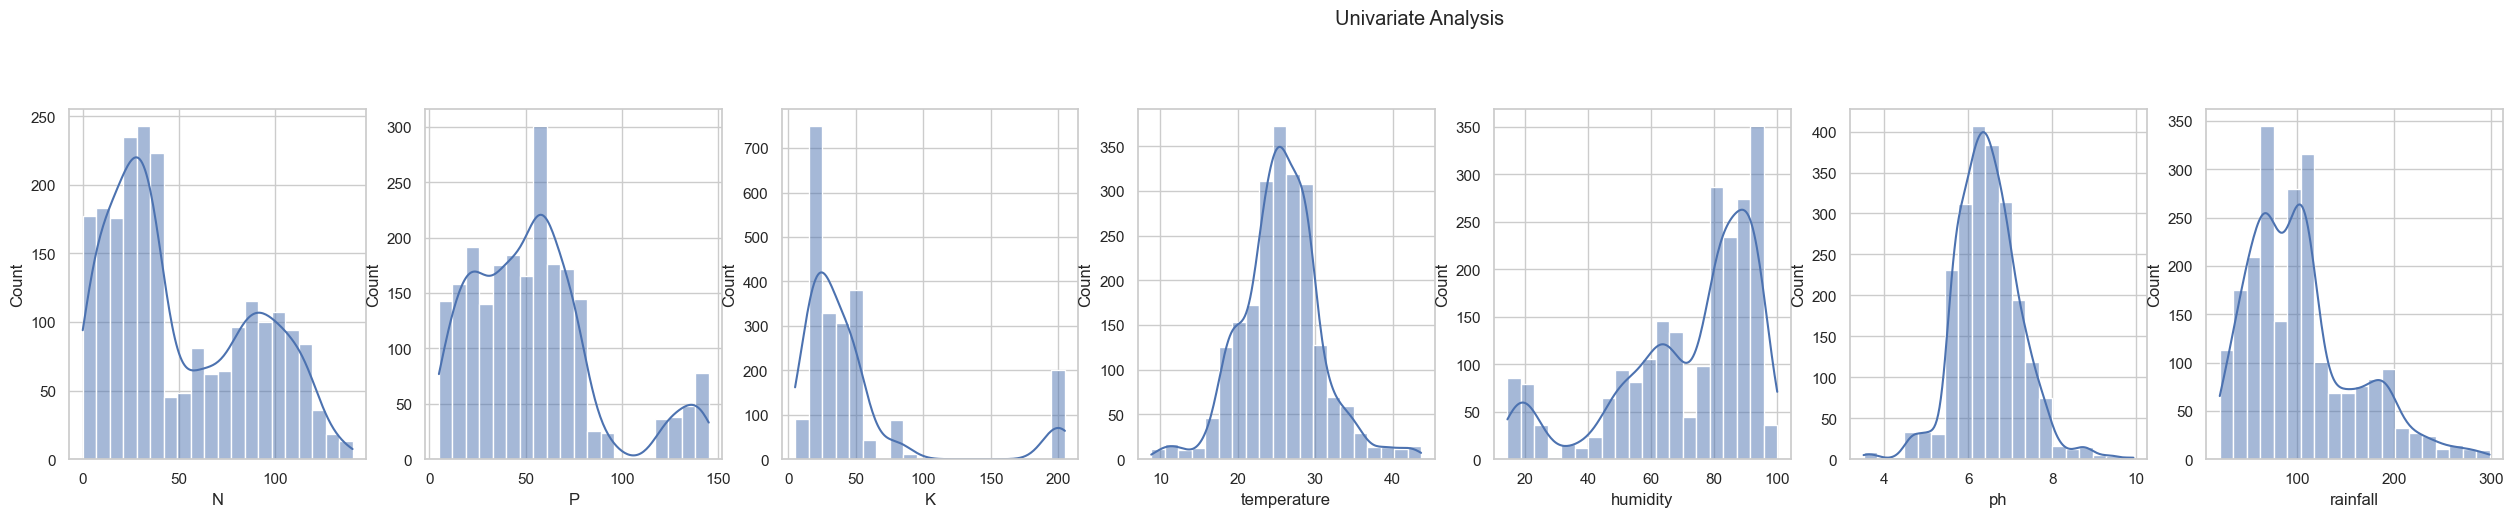

In [132]:
# Create subplots
plt.figure(figsize=(36, 10))  # Increase the height to accommodate two rows

# Univariate analysis for 'N' (Nitrogen)
plt.subplot(2, 8, 1)
skewness_N = data['N'].skew(axis=0)
print("N (Nitrogen) Skewness:", skewness_N)
sns.histplot(data['N'], kde=True, bins=20)

# Univariate analysis for 'P' (Phosphorus)
plt.subplot(2, 8, 2)
skewness_P = data['P'].skew(axis=0)
print("P (Phosphorus) Skewness:", skewness_P)
sns.histplot(data['P'], kde=True, bins=20)

# Univariate analysis for 'K' (Potassium)
plt.subplot(2, 8, 3)
skewness_K = data['K'].skew(axis=0)
print("K (Potassium) Skewness:", skewness_K)
sns.histplot(data['K'], kde=True, bins=20)

# Univariate analysis for 'Temperature'
plt.subplot(2, 8, 4)
skewness_temp = data['temperature'].skew(axis=0)
print("Temperature Skewness:", skewness_temp)
sns.histplot(data['temperature'], kde=True, bins=20)

# Univariate analysis for 'Humidity'
plt.subplot(2, 8, 5)
skewness_humidity = data['humidity'].skew(axis=0)
print("Humidity Skewness:", skewness_humidity)
sns.histplot(data['humidity'], kde=True, bins=20)

# Univariate analysis for 'pH'
plt.subplot(2, 8, 6)
skewness_ph = data['ph'].skew(axis=0)
print("pH Skewness:", skewness_ph)
sns.histplot(data['ph'], kde=True, bins=20)

# Univariate analysis for 'Rainfall'
plt.subplot(2, 8, 7)
skewness_rainfall = data['rainfall'].skew(axis=0)
print("Rainfall Skewness:", skewness_rainfall)
sns.histplot(data['rainfall'], kde=True, bins=20)

# Set the title for the whole plot
plt.suptitle("Univariate Analysis")

# Display the plots
plt.show()

In [133]:
df=data.drop(['label'],axis=1)

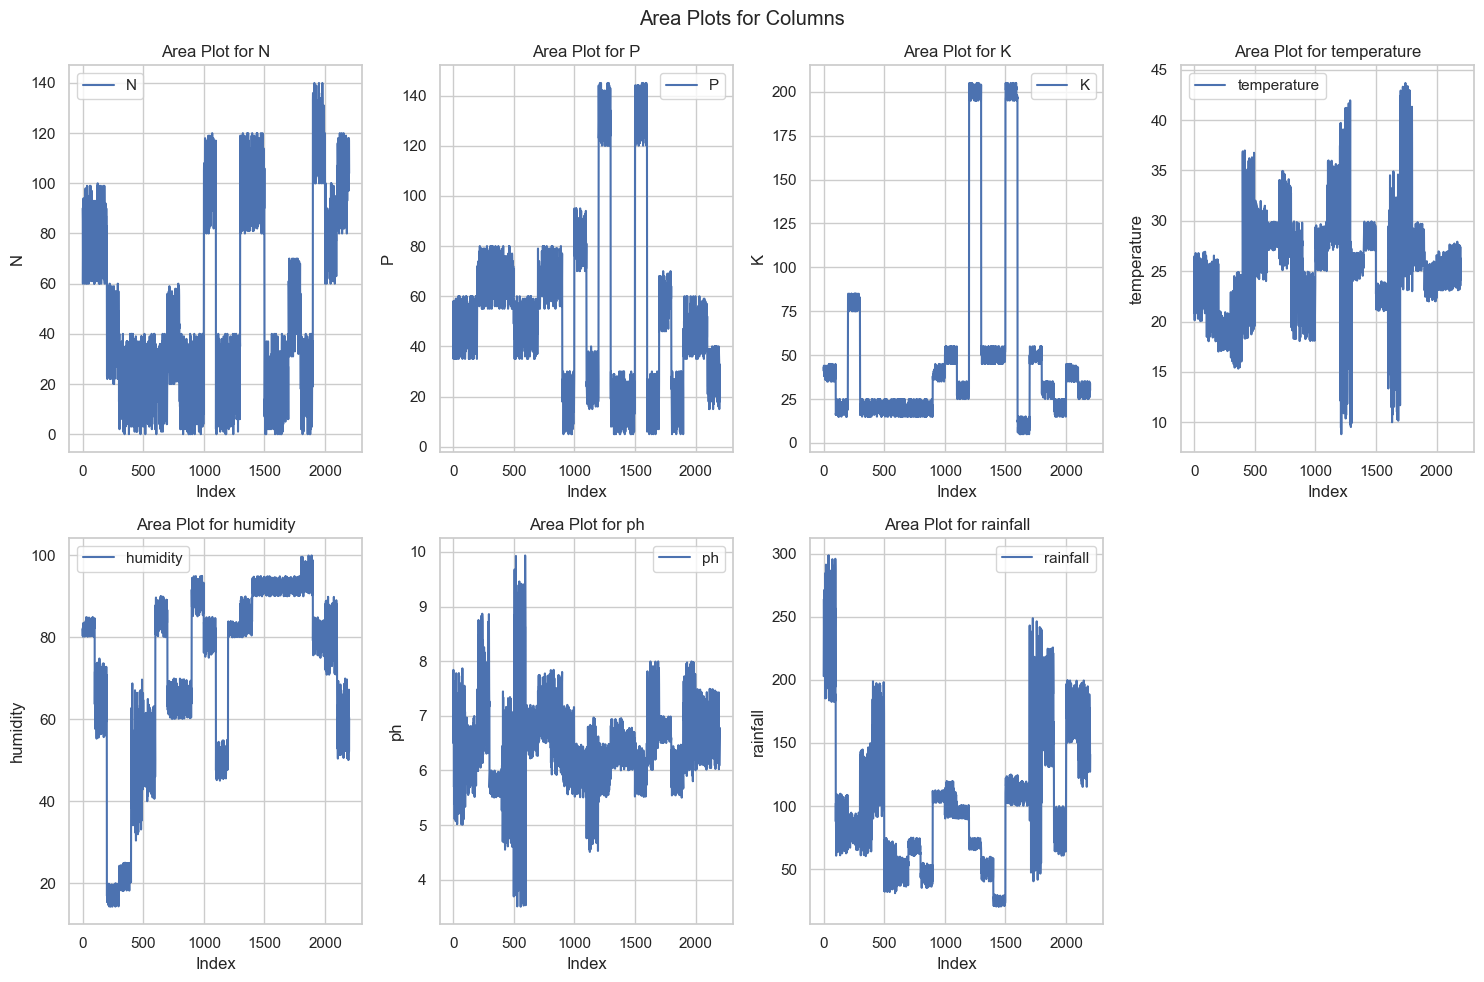

In [134]:
# Create a subplots grid to display area plots for each numeric column
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Adjust the number of rows and columns to match your desired grid size
nrows, ncols = 2, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
fig.suptitle('Area Plots for Columns')

for i, col in enumerate(num_cols):
    if i < (nrows * ncols):
        sns.lineplot(data=df, x=df.index, y=col, ax=axes[i // ncols, i % ncols], label=col)
        axes[i // ncols, i % ncols].set_title(f'Area Plot for {col}')
        axes[i // ncols, i % ncols].set_xlabel('Index')
        axes[i // ncols, i % ncols].set_ylabel(col)

# Delete any remaining empty subplots
for i in range(len(num_cols), nrows * ncols):
    fig.delaxes(axes[i // ncols, i % ncols])

plt.tight_layout()
plt.show()

<Axes: >

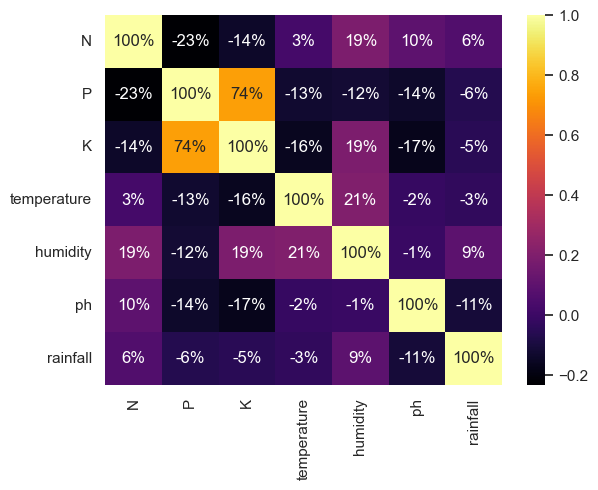

In [135]:
sns.heatmap(df.corr(),cmap='inferno',annot=True,fmt='.0%')

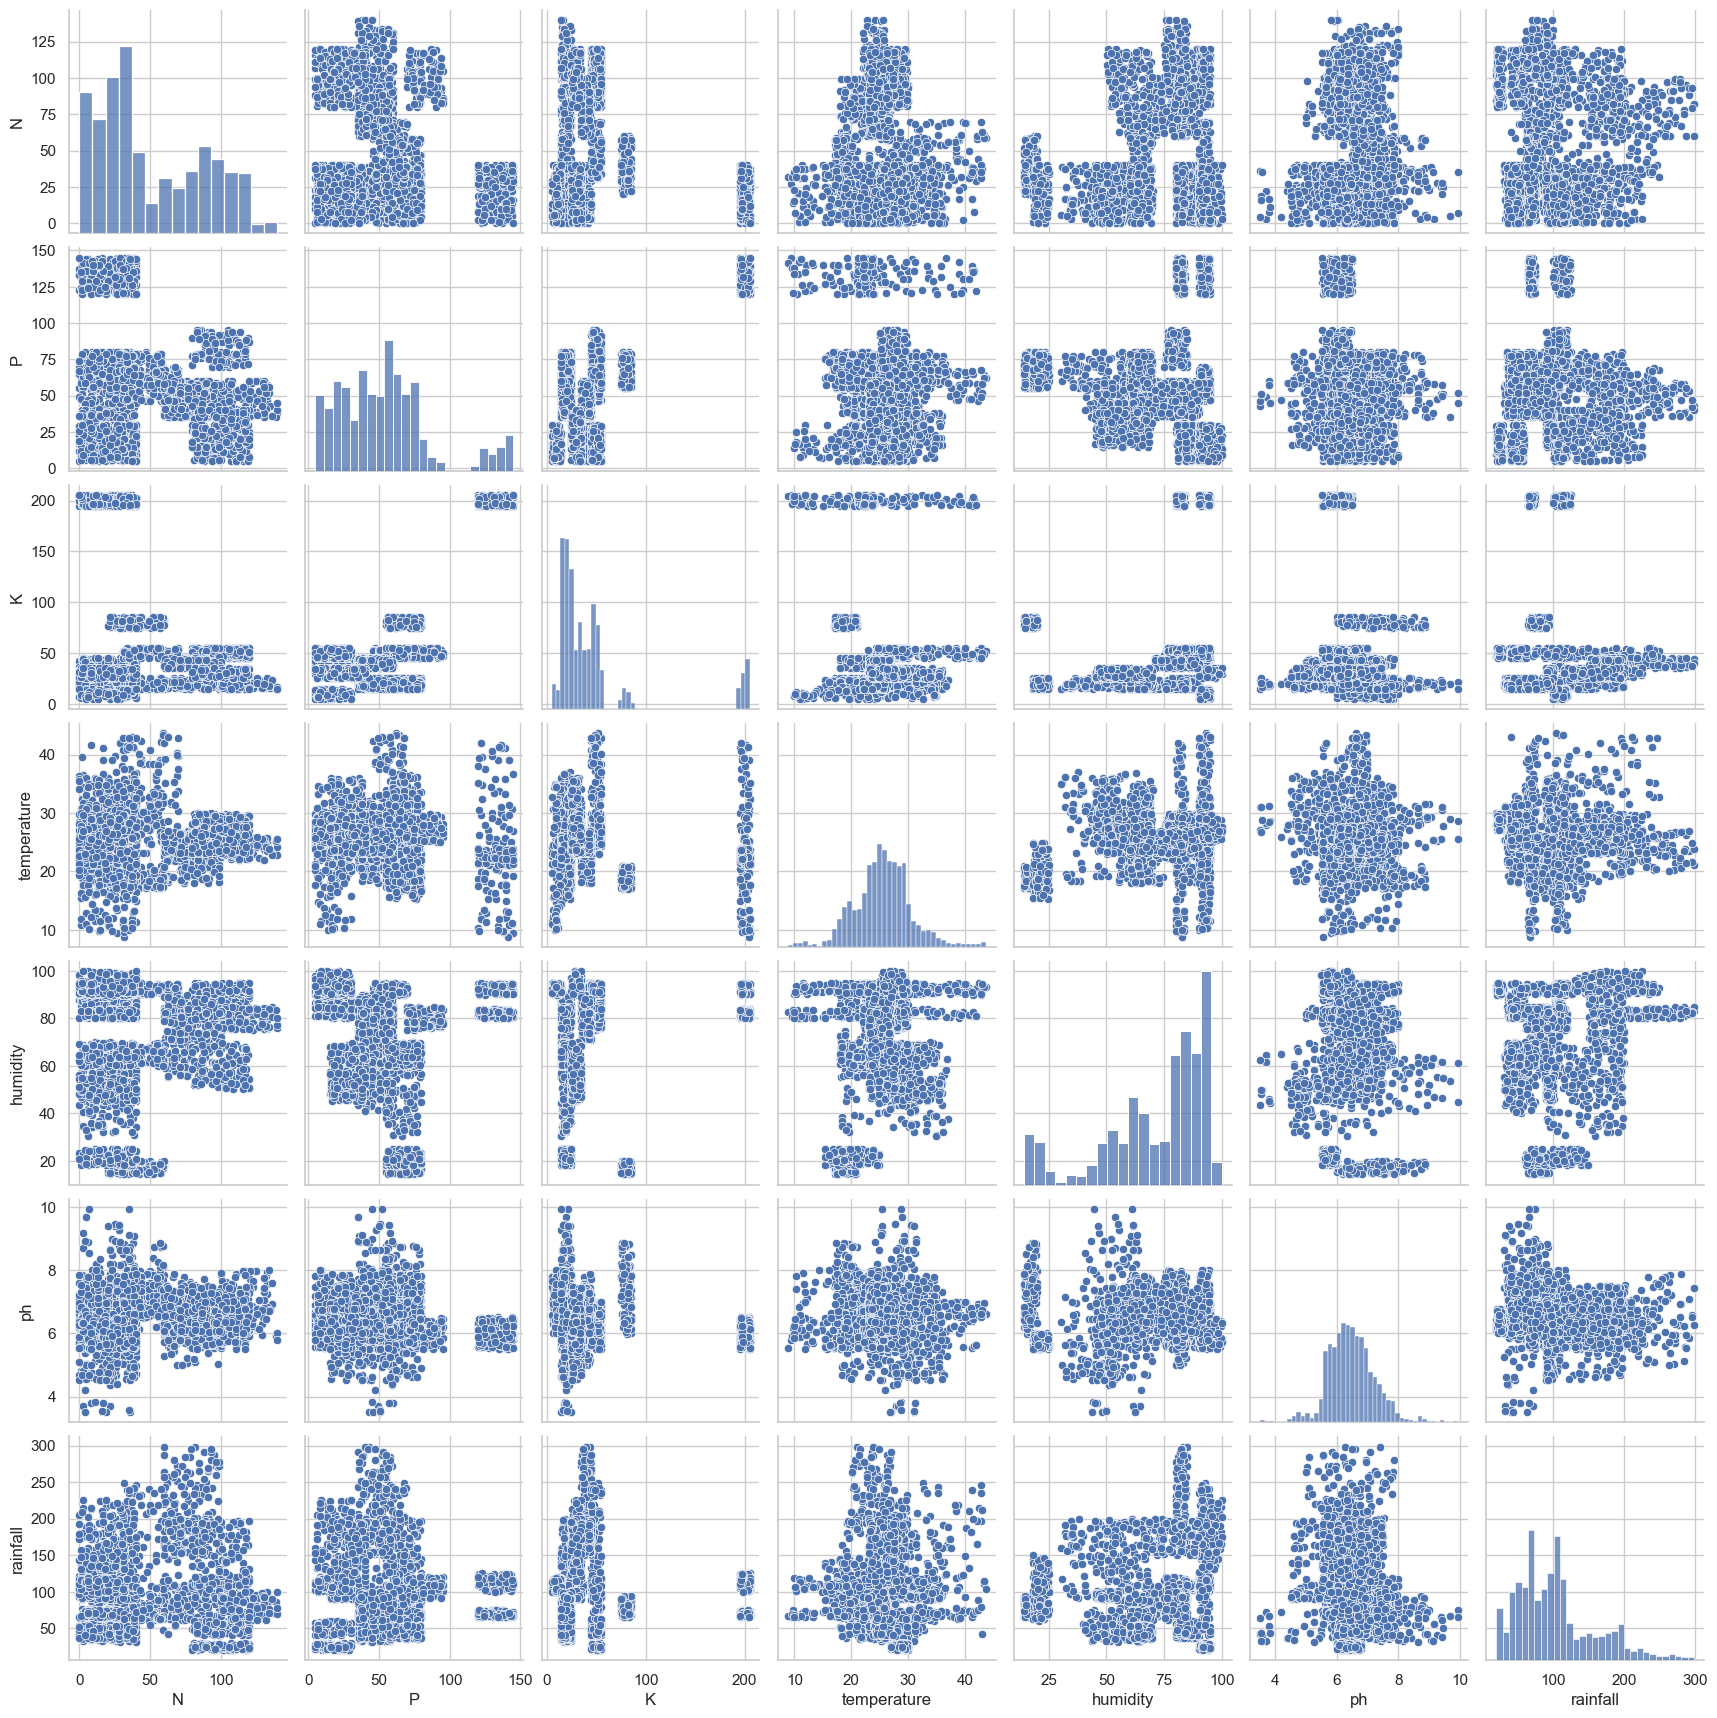

In [136]:
sns.pairplot(data)

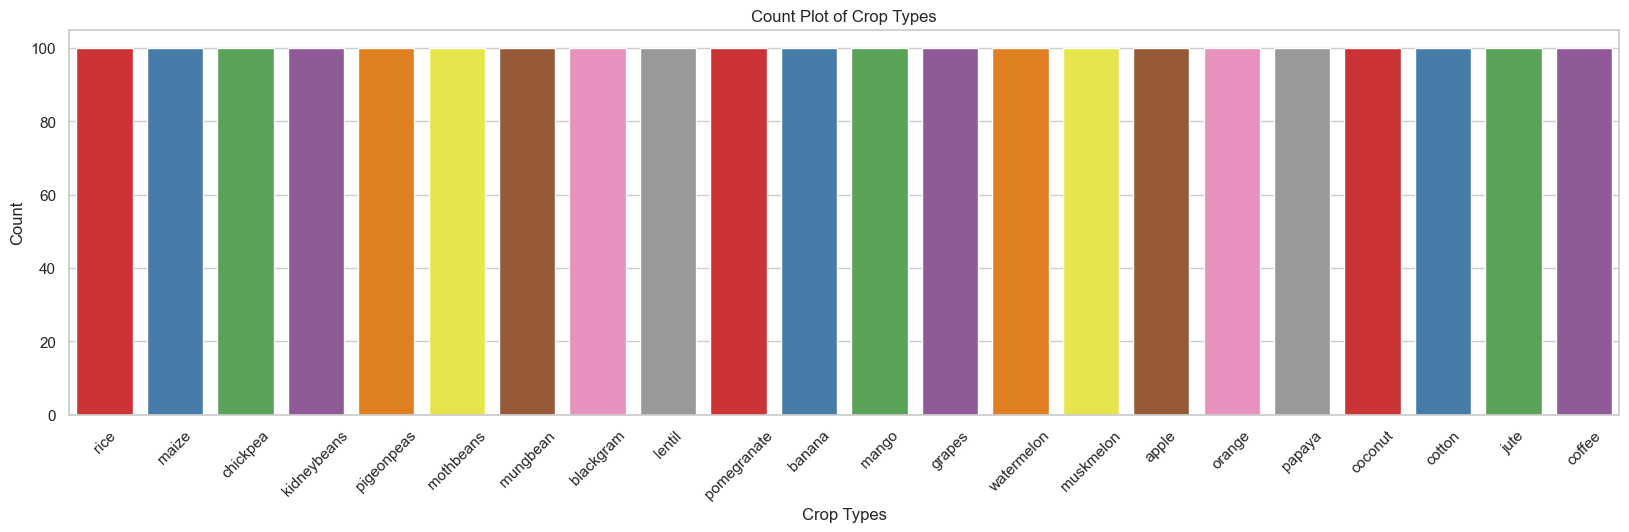

In [137]:
# Create a count plot for the 'Label' column
plt.figure(figsize=(20, 5))
sns.countplot(data=data, x='label', palette='Set1')
plt.title('Count Plot of Crop Types')
plt.xlabel('Crop Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [138]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

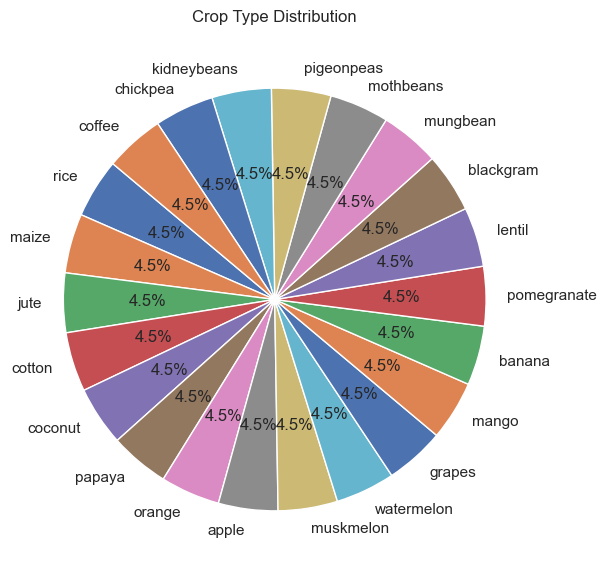

In [139]:
# Count the number of occurrences of each crop type
crop_counts = data['label'].value_counts()
# Create a pie chart using string labels
plt.figure(figsize=(6, 7))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Crop Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

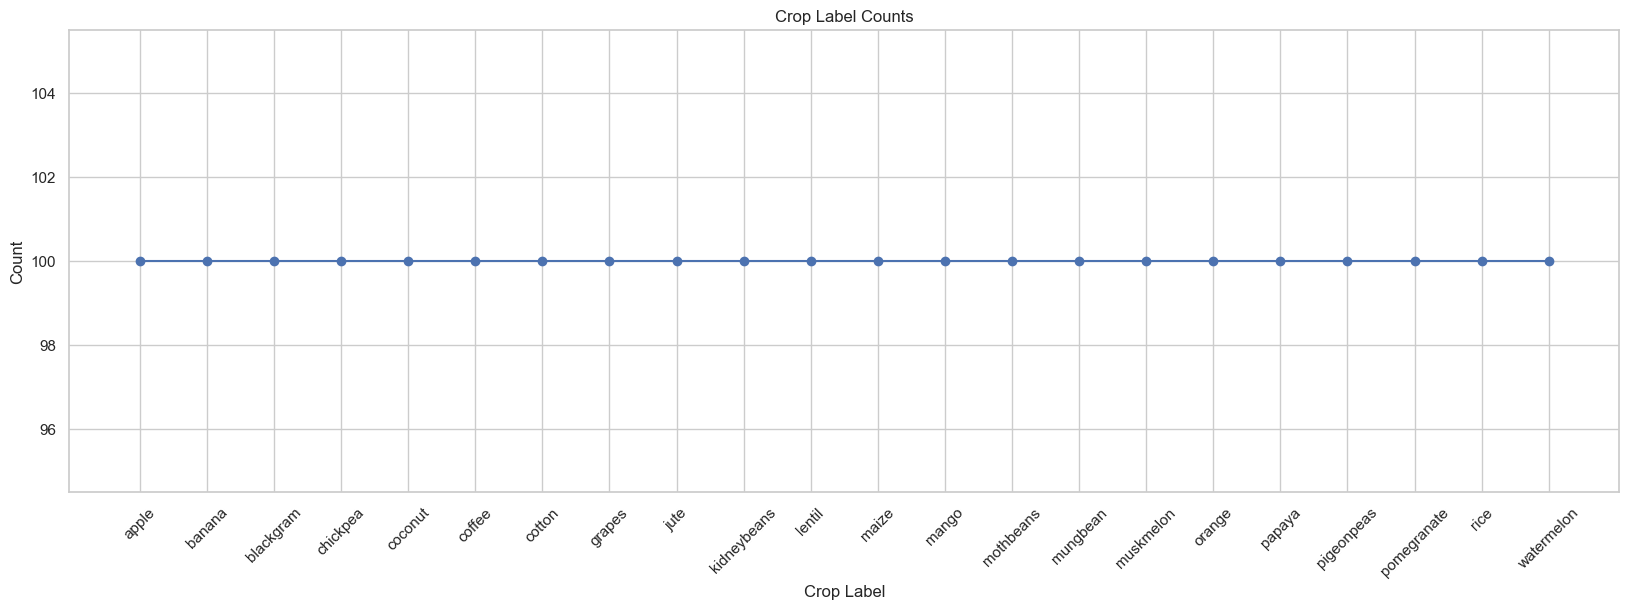

In [140]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each crop label
label_counts = data['label'].value_counts()

# Sort the labels by their counts for a meaningful line plot
label_counts = label_counts.sort_index()

# Create a line plot for the label counts
plt.figure(figsize=(20, 6))
plt.plot(label_counts.index, label_counts.values, marker='o', linestyle='-')
plt.title('Crop Label Counts')
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 5. Splitting Data Set into Training Set and Testing Set

In [141]:
X=data.drop(["label"],axis=1)
Y=data["label"]

In [142]:
X.shape

(2200, 7)

In [143]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [144]:
Y.shape

(2200,)

In [145]:
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [146]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [147]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1102,21,26,27,27.003155,47.675254,5.699587,95.851183
1159,29,35,28,28.347161,53.539031,6.967418,90.402604
141,60,44,23,24.794708,70.045567,5.722580,76.728601
1004,80,77,49,26.054330,79.396545,5.519088,113.229737
2,60,55,44,23.004459,82.320763,7.840207,263.964248
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [148]:
# creating a list for storing accuracies of all models
accuracy_scores=[]
classifiers=['Decision Tree','Random Forest','K Nearesr Neighbors','Gaussian NB','Support Vector Machine','Linear Discriminant Analysis','Gradient Boosting','Extra Trees','Bagging','AdaBoost']

In [149]:
# Decision tree
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = tree.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Decision Tree Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)


# Random Forest
forest  = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
forest.fit(X_train,Y_train)
 # Make predictions on the test set
Y_pred = forest.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Random Forest Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)


# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = knn.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------K-Nearest Neighbors Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)


#Gausian Naive Bayes classifier
Gau = GaussianNB()
Gau.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = Gau.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Gausian Naive Bayes classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)


# Support Vector Machine
V = SVC()
V.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = V.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Support Vector Machine Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)


#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = lda.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Linear Discriminant Analysis Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)
  
  
#Gradient boost
grd = GradientBoostingClassifier()
grd.fit(X_train, Y_train)
# Make predictions on the test set
Y_pred = grd.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Gradient Boosting Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

  
# ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = ext.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Extra Trees Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)


# Bagging
bgg = BaggingClassifier()
bgg.fit(X_train,Y_train) 
# Make predictions on the test set
Y_pred = bgg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Bagging Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)


# adaboost
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = ada.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_scores.append(float(accuracy))
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Ada Boost Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

----------------------------------Decision Tree Classifier--------------------------------------------
Accuracy: 0.9818181818181818
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      0.97      0.99        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.83      0.88      0.86        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.97      0.99        34
    mungbean       1.00      1.00 

In [150]:
print(classifiers)
print(accuracy_scores)

['Decision Tree', 'Random Forest', 'K Nearesr Neighbors', 'Gaussian NB', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Gradient Boosting', 'Extra Trees', 'Bagging', 'AdaBoost']
[0.9818181818181818, 0.9863636363636363, 0.9772727272727273, 0.9939393939393939, 0.9636363636363636, 0.9515151515151515, 0.9833333333333333, 0.990909090909091, 0.9893939393939394, 0.2106060606060606]


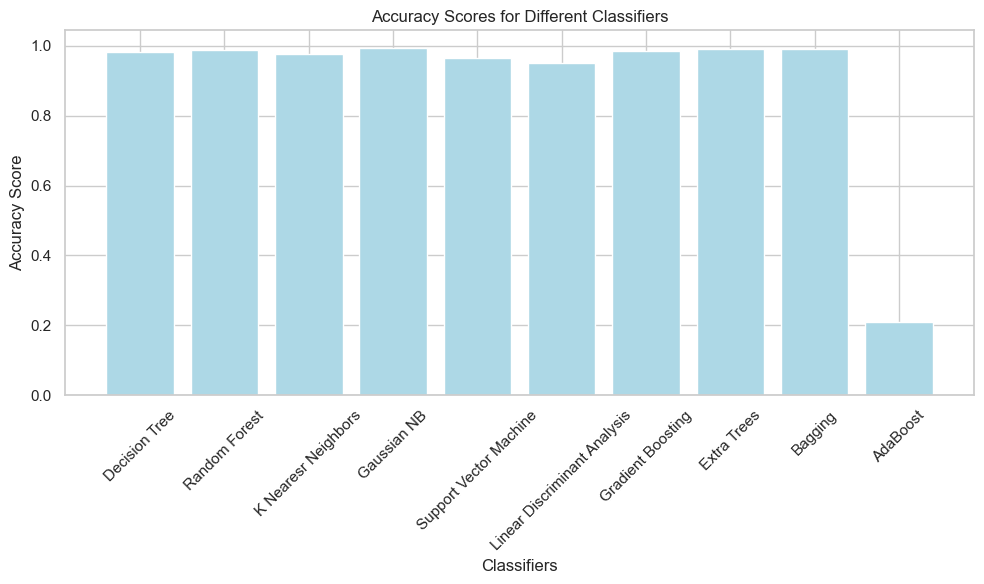

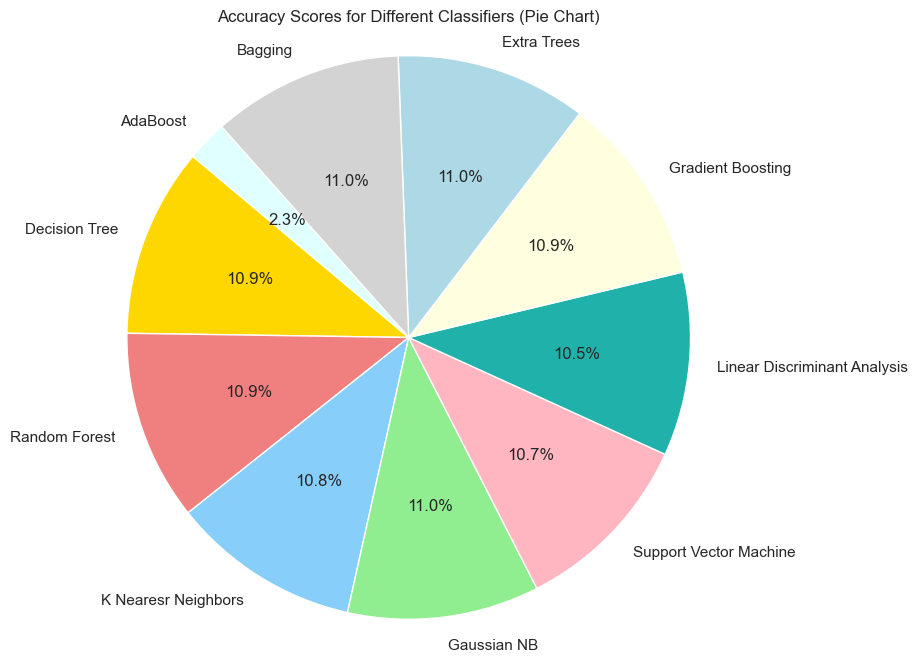

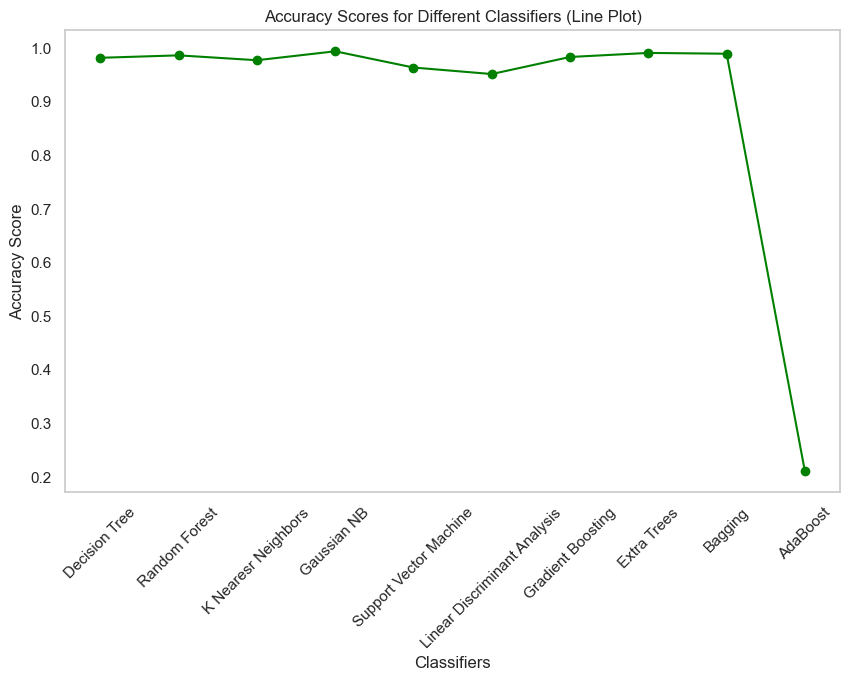

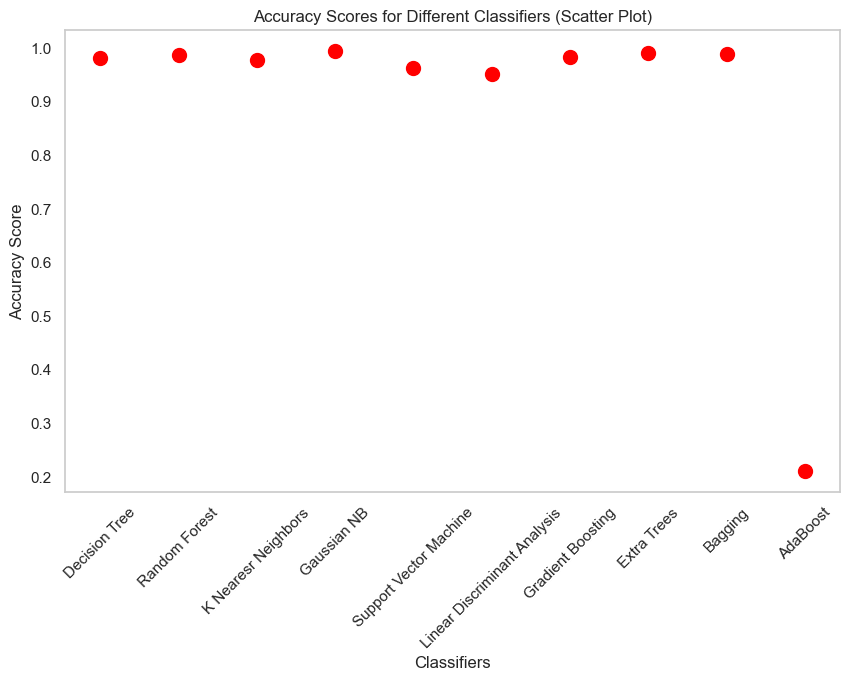

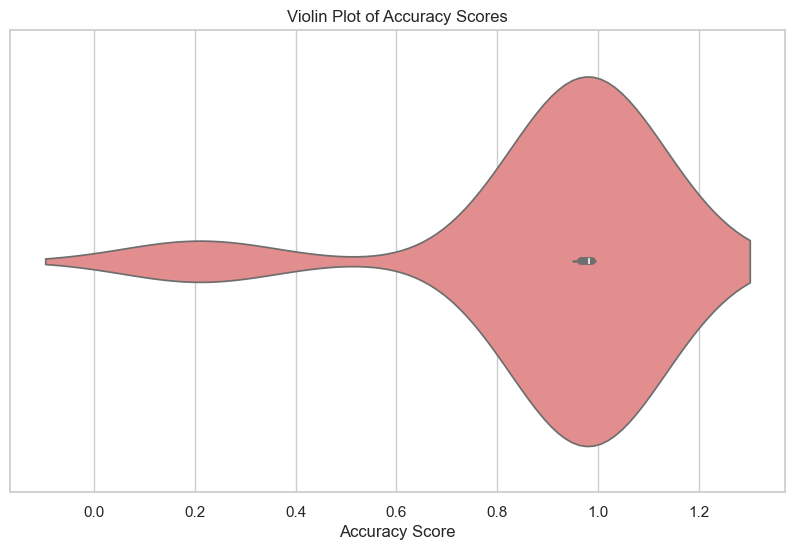

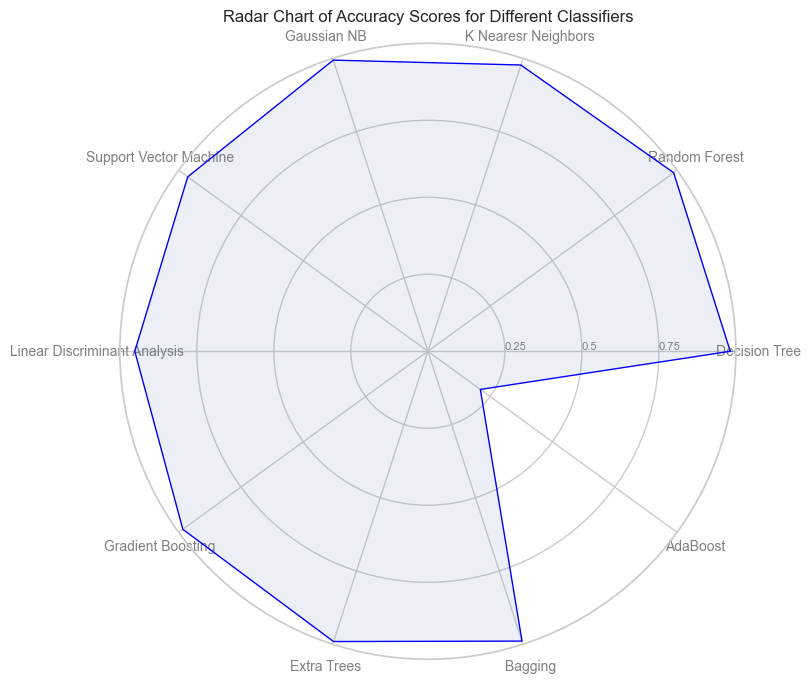

In [151]:
# Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color='lightblue')  # Correct the color
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classifiers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightseagreen', 'lightyellow', 'lightblue', 'lightgrey', 'lightcyan']
plt.pie(accuracy_scores, labels=classifiers, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Accuracy Scores for Different Classifiers (Pie Chart)')
plt.show()

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(classifiers, accuracy_scores, marker='o', linestyle='-', color='green')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classifiers (Line Plot)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(classifiers, accuracy_scores, c='red', marker='o', s=100)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classifiers (Scatter Plot)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=accuracy_scores, color='lightcoral')
plt.xlabel('Accuracy Score')
plt.title('Violin Plot of Accuracy Scores')
plt.show()

# Radar Chart
categories = classifiers
N = len(categories)
values = accuracy_scores
angles = [n / float(N) * 2 * np.pi for n in range(N)]
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=8)
plt.ylim(0, 1)
ax.plot(angles, values, linewidth=1, linestyle='solid', color='blue')
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Radar Chart of Accuracy Scores for Different Classifiers')
plt.show()


### We can see from the accuracy scoroes and plots, Gaussian Naive Bayes is performing best out of all models. So we are choosing this models for crop recommendation system.

In [158]:
# Now, let's make predictions with random values
random_values = [[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]]

# Make predictions
predictions = Gau.predict(random_values)

# Print the predicted labels
print(predictions)

['rice']


In [159]:
import pickle
# Dump the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(Gau, file)

In [160]:
import joblib
joblib.dump(Gau,'model.joblib')

['model.joblib']

In [161]:
model=joblib.load('model.joblib')

In [162]:
# Now, let's make predictions with random values
random_values = [[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]]

# Make predictions
predictions = model.predict(random_values)

# Print the predicted labels
print(predictions)

['rice']
